## GENE ANALYSIS

Genetic expression data is taken from the Allen Brain Human Brain Atlas. 

First we use their data to estimate gene expression at our cortical locations. We then check which genes correlate with our electrophysiological data.

In [5]:
%matplotlib inline

from om.maps.tg import MapCompTG
from om.core.db import OMDB
from om.core.io import save_obj_pickle, load_obj_pickle
from om.plts.maps import plot_gene_corr

In [6]:
# Initialize MapComp object and oscillatory bands list
db = OMDB()
om_maps = MapCompTG(db)

In [7]:
db.check_map_files??

In [8]:
# Check files that are available
db.check_map_files()

Oscillation Files:
 80_new_group_Osc_score.p
78_full_group_Osc_score.p 

Exponent Files:
  

Terms Files:
  

Genes Files:
  



In [9]:
# Load oscillation maps - here using the oscillation scores
om_maps.load_meg_maps('78_full_group_Osc_score')

In [10]:
# Load exponent map
#om_maps.load_exponent_map('Res_Group_85')

In [11]:
# Load gene files
om_maps.load_gene_maps('sub1')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tom/Documents/Research/1-Projects/MEGmapping/2-Data/OMData/Maps/Genes/00-real_gene_names.csv'

In [7]:
## Calculate the correlation between oscillation maps and genes

# Set which method to use
method = 'parallel'

# Calculate correlations between oscillations bands and genes
for band in om_maps.bands:
    om_maps.calc_corrs('Genes', band, method=method, stop_par=False)
    
# Calculate the correlation between exponents and genes
om_maps.calc_corrs('Genes', 'Exponents', method=method, stop_par=True)


 Starting Cluster...
Cluster Started. 

Running in Parallel
Calculating corrs between Genes and Theta
Running in Parallel
Calculating corrs between Genes and Beta
Running in Parallel
Calculating corrs between Genes and LowGamma
Running in Parallel
Calculating corrs between Genes and Alpha
Running in Parallel
Calculating corrs between Genes and Slopes

 Shutting down Cluster...
Cluster shut down. 



In [8]:
# Print out highest correlated genes for each oscillation band
for band in om_maps.bands:
    om_maps.check_corrs('Genes', band, n_check=50, top=True)



Correlations for  Genes  &   Theta : 

# 	 Genes                                                   	 R-Vals 	 P-vals 

1 	 twist family bHLH transcription factor 2                	 0.47295 	 0.0000e+00
2 	 kallikrein-related peptidase 5                          	 0.42556 	 4.1820e-285
3 	 spondin 2, extracellular matrix protein                 	 0.42215 	 4.1167e-280
4 	 receptor (chemosensory) transporter protein 1           	 0.42135 	 5.9777e-279
5 	 germ cell associated 1                                  	 0.40952 	 4.0065e-262
6 	 alkaline phosphatase, liver/bone/kidney                 	 0.40372 	 4.0100e-254
7 	 CD6 molecule                                            	 0.39759 	 7.9018e-246
8 	 protein phosphatase, EF-hand calcium binding domai      	 0.39319 	 5.3649e-240
9 	 Rho GTPase activating protein 28                        	 0.38812 	 2.2997e-233
10 	 proline-rich acidic protein 1                           	 0.38444 	 1.2110e-228
11 	 NIMA-related kinase 2             

In [9]:
# Print out the highest correlated genes for exponents
om_maps.check_corrs('Genes', 'Exponents', n_check=50)



Correlations for  Genes  &   Slopes : 

# 	 Genes                                                   	 R-Vals 	 P-vals 

1 	 tetratricopeptide repeat domain 21B                     	 0.57465 	 0.0000e+00
2 	 ST3 beta-galactoside alpha-2,3-sialyltransferase 6      	 0.54371 	 0.0000e+00
3 	 collagen, type V, alpha 1                               	 0.52230 	 0.0000e+00
4 	 uridine phosphorylase 1                                 	 0.52062 	 0.0000e+00
5 	 synaptonemal complex protein 2                          	 0.51199 	 0.0000e+00
6 	 follistatin-like 1                                      	 0.50956 	 0.0000e+00
7 	 Ras association (RalGDS/AF-6) domain family member      	 0.50804 	 0.0000e+00
8 	 Abelson helper integration site 1                       	 0.50531 	 0.0000e+00
9 	 ankyrin repeat and SOCS box containing 13               	 0.50482 	 0.0000e+00
10 	 solute carrier family 25 (aspartate/glutamate carr      	 0.50406 	 0.0000e+00
11 	 bone morphogenetic protein/retinoic acid i

In [10]:
# Save calculated correlations to file
for band in om_maps.bands:
    om_maps.save_corrs('Genes', band, 'Gr_85', save_as_npz=True, save_as_csv=True)

# Save calculated correlations to file
om_maps.save_corrs('Genes', 'Exponents', 'Gr_85', save_as_npz=True, save_as_csv=True)

In [12]:
# Save out as pickled object
#save_obj_pickle(om_maps, 'maps', 'Genes')

## Plots of individual correlations

In [9]:
# Set data
gene_name = 'potassium channel tetramerization domain containing 9 pseudogene 6'
cur_band = 'Beta'

In [10]:
# Pull out data
meg_dat = om_maps.meg_maps[cur_band]

gene_ind = om_maps.gene_names.index(gene_name)
gene_dat = om_maps.gene_maps[gene_ind].as_matrix()

r_val = om_maps.corrs['Genes'][cur_band][gene_ind]

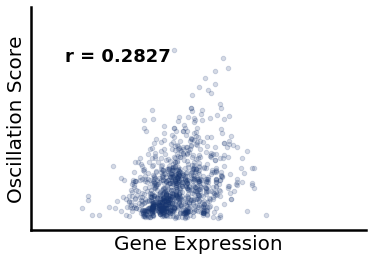

In [21]:
# Plot correlation plot of particular gene/osc pair
plot_gene_corr(gene_dat, meg_dat, r_val)

### Calculate Average Gene Results

In [ ]:
from om.maps.tg import calc_avg_gene_map

In [ ]:
# Calculate average gene expressions across all gene-subjects
subj_list = ['sub1', 'sub2', 'sub3', 'sub4', 'sub5', 'sub6']
calc_avg_gene_map(subj_list, 'All')